### Loading Packages

In [125]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing



In [126]:
data = pd.read_csv('values.csv') #importing data


In [127]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [128]:
data.isnull() #Detect missing values

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [130]:
data.shape

(180, 14)

In [131]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [132]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [134]:
data.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811


In [135]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['thal'].astype(str))
data['thal'] = label.transform(data['thal'].astype(str))
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [136]:
data_1 = pd.read_csv("labels.csv")

In [137]:
data2 = pd.merge(data, data_1)
data2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [138]:
data2.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [139]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    int32  
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

#### From above it is found that the given dataset has no missing or NAN values 

### EDA

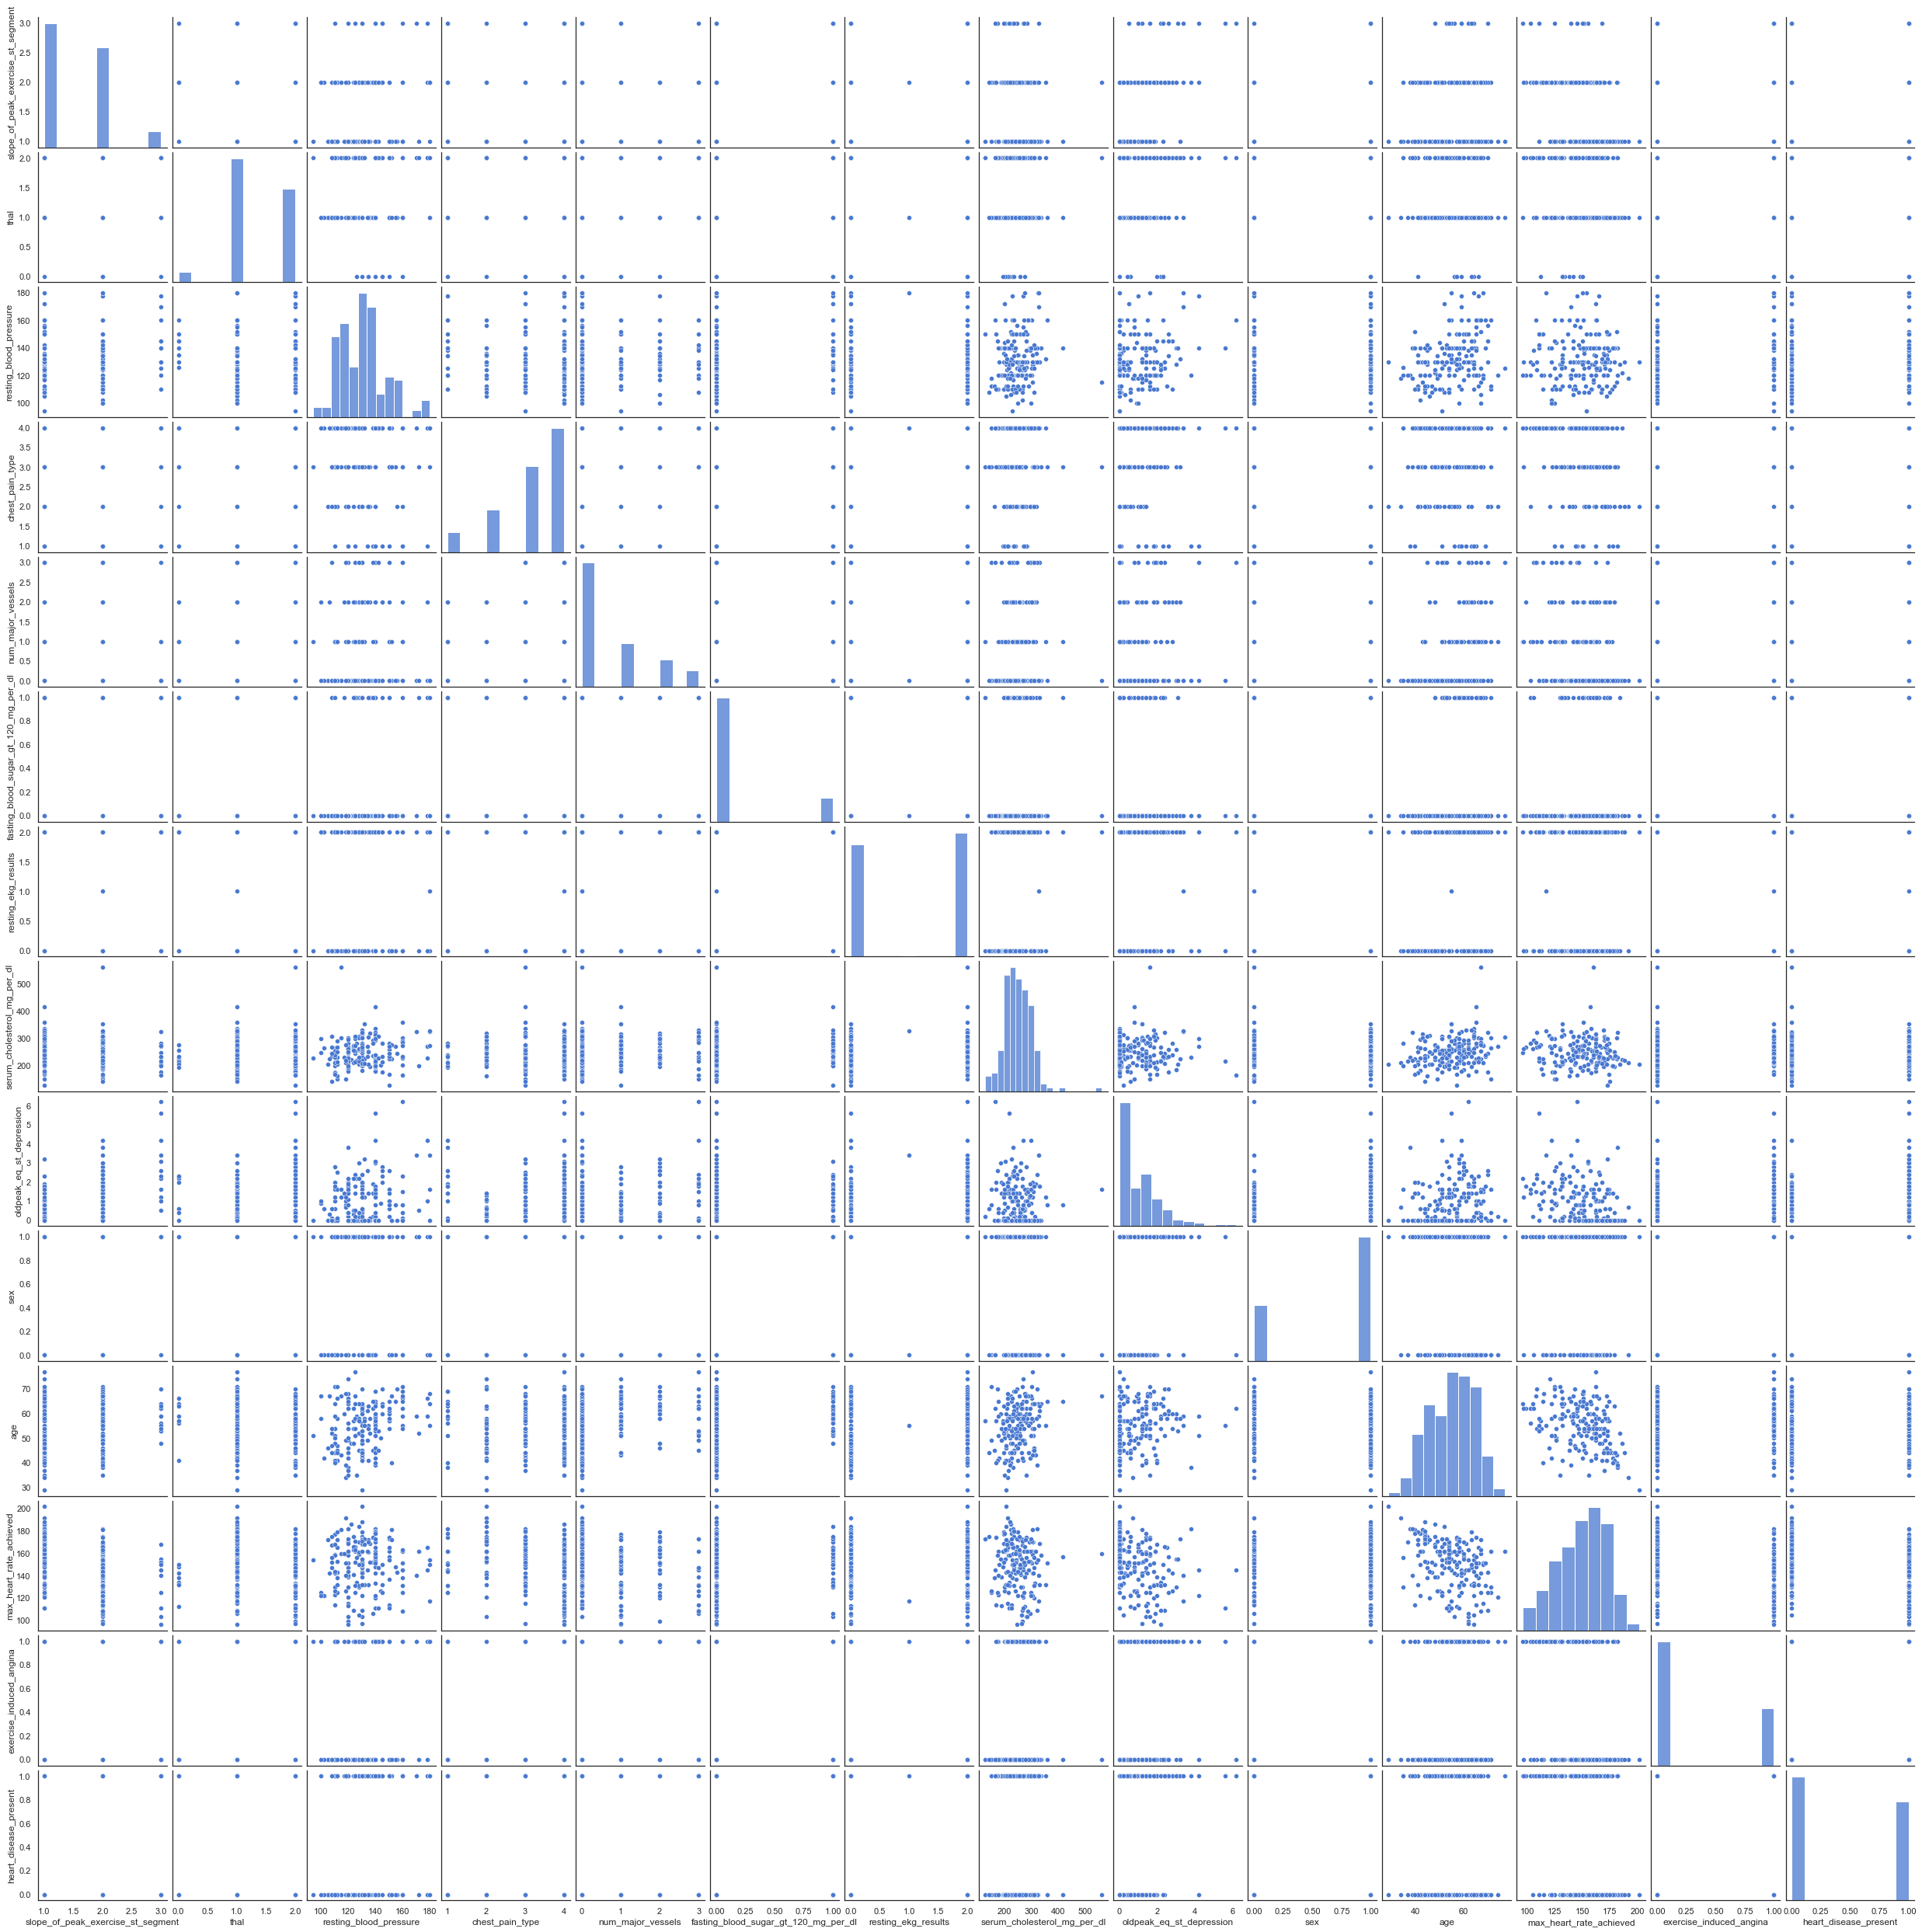

In [140]:
sns.pairplot(data2)

In [141]:
data2.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,0.265420,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421


##### From above it is found that Chest pain, Slope of peak, Thal, No. of major vessels, Sex, Exercise induced angina is positively correlated  to Heart disease present. And also heart disease present and maximum heart rate achieved is negatively correlated


<AxesSubplot:>

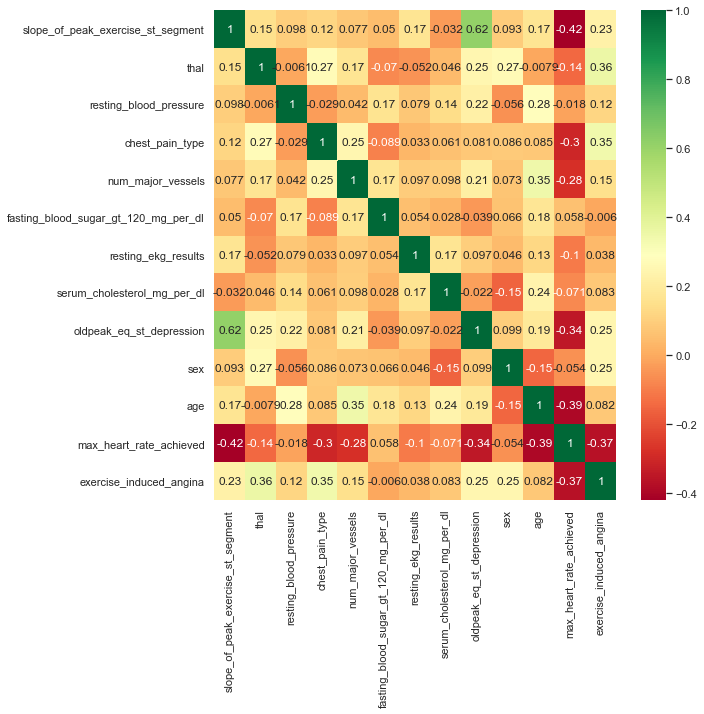

In [142]:
corr=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap="RdYlGn", annot=True)

###  Data Visualization

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

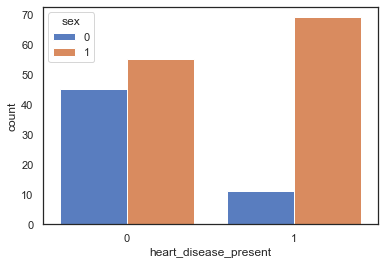

In [143]:
sns.countplot(x=data2['heart_disease_present'],hue='sex',data=data2)

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

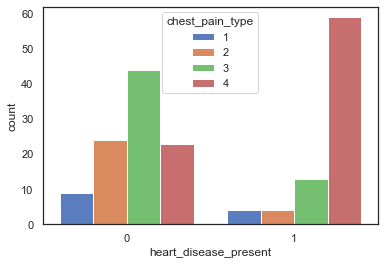

In [144]:
sns.countplot(x=data2['heart_disease_present'],hue='chest_pain_type',data=data2)

<AxesSubplot:xlabel='sex', ylabel='count'>

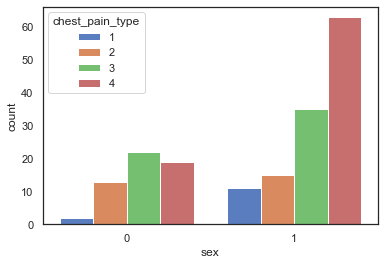

In [145]:
sns.countplot(x=data2['sex'],hue='chest_pain_type',data=data2)

<AxesSubplot:xlabel='sex', ylabel='resting_blood_pressure'>

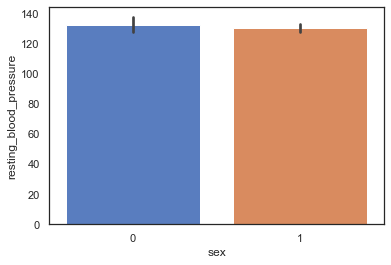

In [146]:
sns.barplot(x=data2['sex'],y='resting_blood_pressure',data=data2)

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

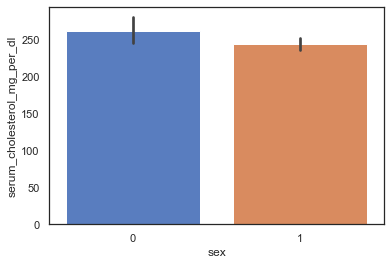

In [147]:
sns.barplot(x=data2['sex'],y=data2['serum_cholesterol_mg_per_dl'],data=data2)

<AxesSubplot:xlabel='heart_disease_present', ylabel='serum_cholesterol_mg_per_dl'>

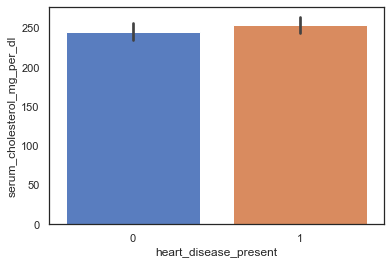

In [148]:
sns.barplot(x=data2['heart_disease_present'],y=data2['serum_cholesterol_mg_per_dl'],data=data2)

<AxesSubplot:xlabel='sex', ylabel='heart_disease_present'>

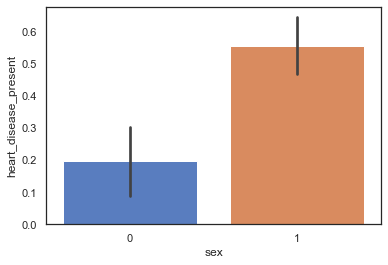

In [149]:
sns.barplot(x=data2['sex'],y=data2['heart_disease_present'],data=data2)

<AxesSubplot:xlabel='heart_disease_present', ylabel='resting_blood_pressure'>

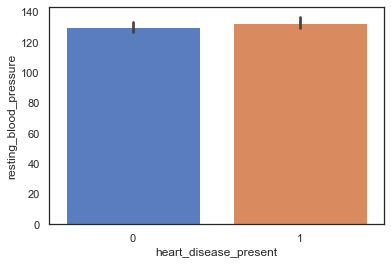

In [150]:
sns.barplot(x=data2['heart_disease_present'],y=data2['resting_blood_pressure'],data=data2)

<AxesSubplot:xlabel='age', ylabel='resting_blood_pressure'>

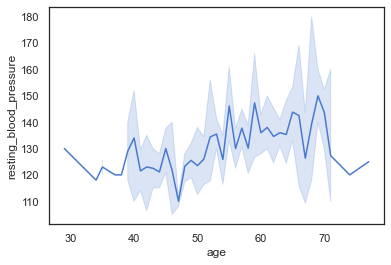

In [151]:
sns.lineplot(x=data2['age'],y='resting_blood_pressure',data=data2)

<AxesSubplot:xlabel='sex', ylabel='oldpeak_eq_st_depression'>

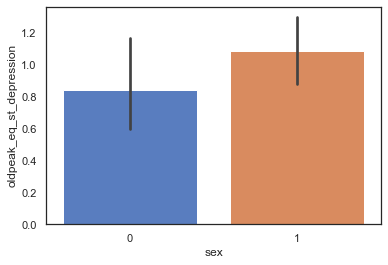

In [152]:
sns.barplot(x=data2['sex'],y='oldpeak_eq_st_depression',data=data2)

In [153]:
#Target Class Count
target_class=data2['heart_disease_present'].value_counts()
print('Count of the target class :\n',target_class)

#Percentage of target class count
per_target_class=data2['heart_disease_present'].value_counts()/len(data2)*100
print('Percentage of target class count :\n',per_target_class)

Count of the target class :
 0    100
1     80
Name: heart_disease_present, dtype: int64
Percentage of target class count :
 0    55.555556
1    44.444444
Name: heart_disease_present, dtype: float64


In [154]:
x = data2.iloc[:,1:14]

In [155]:
y = data2.iloc[:,-1]

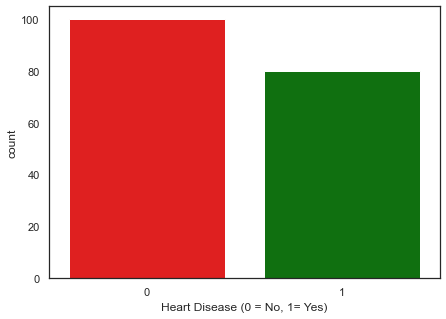

In [156]:
plt.figure(figsize=(7,5)) 
sns.countplot(x=data2.heart_disease_present, data=data2, palette=('red','green',))
plt.xlabel("Heart Disease (0 = No, 1= Yes)")  
plt.show()

####  Checking Outliers

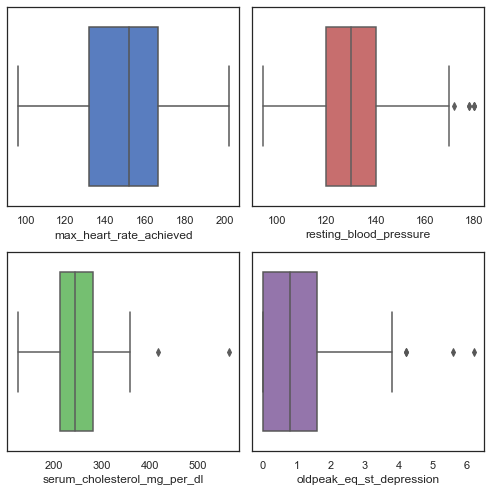

In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7))
#sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.boxplot(data2["max_heart_rate_achieved"], color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.boxplot(data2["resting_blood_pressure"], color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.boxplot(data2["serum_cholesterol_mg_per_dl"], color="g", ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.boxplot(data["oldpeak_eq_st_depression"], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Removing outliers

In [158]:

mean = np.mean(data["serum_cholesterol_mg_per_dl"]) 
std = np.std(data["serum_cholesterol_mg_per_dl"]) 
threshold = 3
outlier = [] 
for i in data["serum_cholesterol_mg_per_dl"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [417, 564]


In [159]:
data["serum_cholesterol_mg_per_dl"] = data["serum_cholesterol_mg_per_dl"].replace([417,564],250)

In [160]:

mean = np.mean(data["serum_cholesterol_mg_per_dl"]) 
std = np.std(data["serum_cholesterol_mg_per_dl"]) 
threshold = 3
outlier = [] 
for i in data["serum_cholesterol_mg_per_dl"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 


outlier in dataset is []


In [161]:
mean = np.mean(data["resting_blood_pressure"]) 
std = np.std(data["resting_blood_pressure"]) 
threshold = 3
outlier = [] 
for i in data["resting_blood_pressure"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 


outlier in dataset is []


In [162]:
mean = np.mean(data["oldpeak_eq_st_depression"]) 
std = np.std(data["oldpeak_eq_st_depression"]) 
threshold = 3
outlier = [] 
for i in data["oldpeak_eq_st_depression"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 


outlier in dataset is [5.6, 6.2]


In [163]:
data["oldpeak_eq_st_depression"] = data["oldpeak_eq_st_depression"].replace([4.2,4.2],3)

In [164]:
mean = np.mean(data["oldpeak_eq_st_depression"]) 
std = np.std(data["oldpeak_eq_st_depression"]) 
threshold = 3
outlier = [] 
for i in data["oldpeak_eq_st_depression"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [5.6, 6.2]


In [165]:
data["oldpeak_eq_st_depression"] = data["oldpeak_eq_st_depression"].replace([5.6,6.2],3)

In [166]:
mean = np.mean(data["oldpeak_eq_st_depression"]) 
std = np.std(data["oldpeak_eq_st_depression"]) 
threshold = 3
outlier = [] 
for i in data["oldpeak_eq_st_depression"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


#### outliers present in the dataset is removed above

In [167]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Training Part

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 54)

In [169]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((126, 13), (54, 13), (126,), (54,))

### SMOTE model is used to treat the imbalenced data

In [170]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(x_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(x_test,y_test)

Wall time: 3 ms


In [171]:
%%time
#Logistic regression model for SMOTE:-
smote= LogisticRegression(C=0.23,penalty='l2',dual=False, tol=0.00001, fit_intercept=True, intercept_scaling=3, class_weight='balanced', random_state=62, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=3, warm_start=False, n_jobs=None, l1_ratio=None)

#fitting the smote model:-
smote.fit(X_smote,y_smote)

Wall time: 82.8 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.23, class_weight='balanced', intercept_scaling=3,
                   max_iter=10000, random_state=62, tol=1e-05, verbose=3)

In [172]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.8412698412698413


In [173]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

In [174]:
%%time
#Cross validation prediction for SMOTE:-||
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=3)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=3)
print('Cross validation score :',np.average(cv_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Cross validation score : 0.9322222222222222
Wall time: 483 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [175]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score, classification_report,confusion_matrix,roc_auc_score,auc

In [176]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)
cm

Wall time: 12 ms


col_0,0,1
heart_disease_present,,
0,33,4
1,1,36


##### Classification metrics

In [177]:
print(classification_report(y_smote_v,cv_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.90      0.97      0.94        37

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.94      0.93      0.93        74



In [178]:
f1_score(y_smote_v,cv_pred)

0.935064935064935

In [179]:
cv_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [180]:
accuracy_score(y_smote_v,cv_pred)

0.9324324324324325

In [181]:
roc_auc_score(y_smote_v,cv_pred)

0.9324324324324325

In [182]:
recall_score(y_smote_v,cv_pred)

0.972972972972973

## Conclusion

* From the given data it is found that Male has the more heart disease present compared to the female
* By using Logistic regression, XGBoost, LGBoost, Random forest, KNN algorithoms with out parameter tuning it shows accuracy0.70 and f1-score 0.62 and ROC score as 0.54 due to outliers.
* With Random forest with SMOTE model to make the imbalence data to balanced data it shows ROC Score as 0.80
* Then tried with LGboost it shows the ROC score as 0.76
* With Logistic Regression it shows the ROC score as 0.80 with out parameter tuning and with using SMOTE model
* Then with Parameter tuning and by using SMOTE model in Logistic regression method it shows the ROC, F1 score, Accuracy score as 0.93
* So it is found that Logistic regression method with parameter tuning and using SMOTE model shows the better accuracy and ROC score.